In [45]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ACCESS_TOKEN = "545740744-WV9TEBIcUD89VcD9eyYmYPIiM8GcLYvWwjGnSmoc"
ACCESS_TOKEN_SECRET = "7ZGS5pYNwtjDGDAEDc3nCO4NLhdFKf97u79yOTWx02S1G"
CONSUMER_KEY = "i1tyuoX3hURpMhc1TpX6JmuQB"
CONSUMER_SECRET = "YyFcD94eXxZNpULqqdHUkPaN09kSzrV0NxeXG2mgNGHeAUg4pf"
 

class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets


class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        return auth


class TwitterStreamer():
    
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)



class TwitterListener(StreamListener):
   
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            return False
        print(status)


class TweetAnalyzer():
    
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        df['location']= np.array([tweet.user.location for tweet in tweets])

        return df

 
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="realDonaldTrump", count=20)

    print(dir(tweets[0]))
    
    print(tweets[0].retweet_count)
    
    print(tweets[0].source)
    
    print(tweets[0].text)
    
    print(tweets[0])
    
    print(tweets[0].user.location)


    df = tweet_analyzer.tweets_to_data_frame(tweets)

    print(np.mean(df['len']))

    
    print(np.max(df['likes'])) 

    
    print(np.max(df['retweets']))
    
    print(df.head(10))
    

    

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']
23333
Twitter for iPhone
MAKE AMERICA GREAT AGAIN!
Status(_api=<tweepy.api.API object at 0x000002B02317F668>, _json={'created_at': 'Sun Aug 18 12:34:53 +0000 2019', 'id': 11630667355

117.05
118830
46065
                                              tweets                   id  \
0                          MAKE AMERICA GREAT AGAIN!  1163066735588720640   
1  With all that this Administration has accompli...  1163064539837022209   
2  .....”Journalism” has reached a new low in the...  1163063728218263552   
3  The Failing New York Times, in one of the most...  1163063723952676864   
4       RT @realDonaldTrump: https://t.co/JDS4zVfyBe  1162851091987488774   
5  RT @SharylAttkisson: I read that Trump rally w...  1162850561819103233   
6  RT @FullMeasureNews: Coming up this Sunday on ...  1162850237968506880   
7  RT @SharylAttkisson: From what I can tell, he ...  1162850126366412800   
8  RT @cleared37Joseph: SAVED 🇺🇸&amp;🌍Peace &amp;...  1162849601017323526   
9  RT @FullMeasureNews: Sunday on Full Measure: C...  1162849487884300289   

   len                date              source   likes  retweets  \
0   25 2019-08-18 12:34:53  Twitter for iPhone  118830     23333

In [51]:
print(df.head(20))

                                               tweets                   id  \
0                           MAKE AMERICA GREAT AGAIN!  1163066735588720640   
1   With all that this Administration has accompli...  1163064539837022209   
2   .....”Journalism” has reached a new low in the...  1163063728218263552   
3   The Failing New York Times, in one of the most...  1163063723952676864   
4        RT @realDonaldTrump: https://t.co/JDS4zVfyBe  1162851091987488774   
5   RT @SharylAttkisson: I read that Trump rally w...  1162850561819103233   
6   RT @FullMeasureNews: Coming up this Sunday on ...  1162850237968506880   
7   RT @SharylAttkisson: From what I can tell, he ...  1162850126366412800   
8   RT @cleared37Joseph: SAVED 🇺🇸&amp;🌍Peace &amp;...  1162849601017323526   
9   RT @FullMeasureNews: Sunday on Full Measure: C...  1162849487884300289   
10  Such a disgrace at the once great @nytimes! ht...  1162848686797414400   
11  RT @twytter14: @tashlutsa @realDonaldTrump @CL...  116284811

In [31]:
#

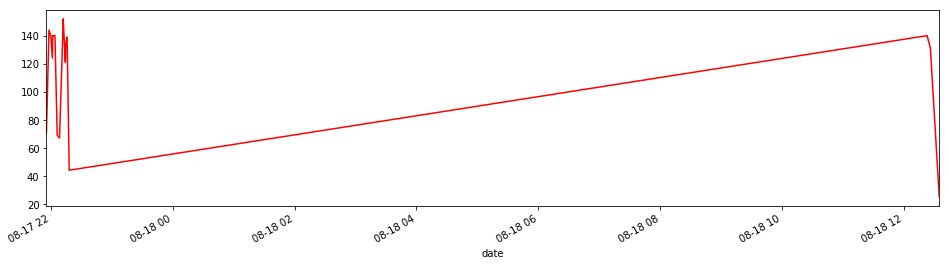

In [46]:
time_likes = pd.Series(data=df['len'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), color='r')
plt.show()

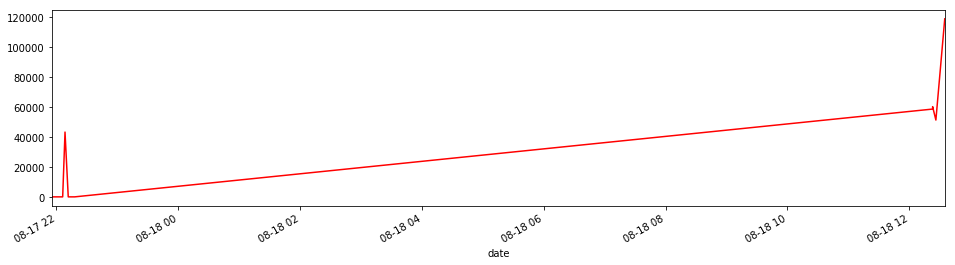

In [47]:
time_favs = pd.Series(data=df['likes'].values, index=df['date'])
time_favs.plot(figsize=(16, 4), color='r')
plt.show()

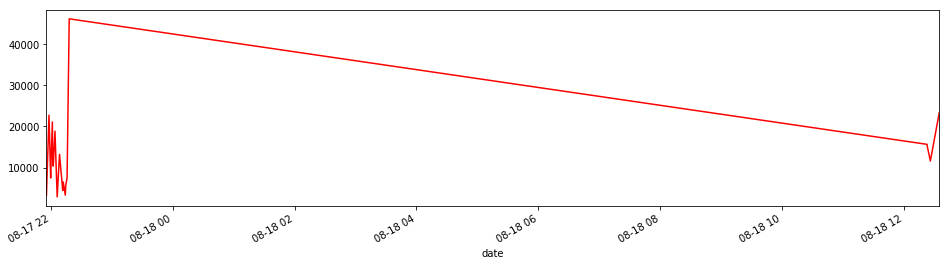

In [48]:
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), color='r')
plt.show()

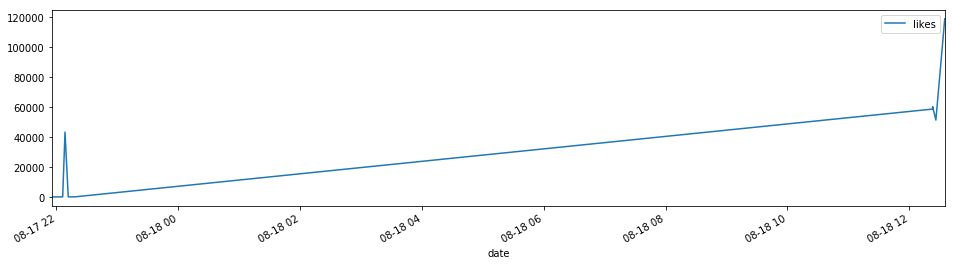

In [49]:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), label="likes", legend=True)
plt.show()
    

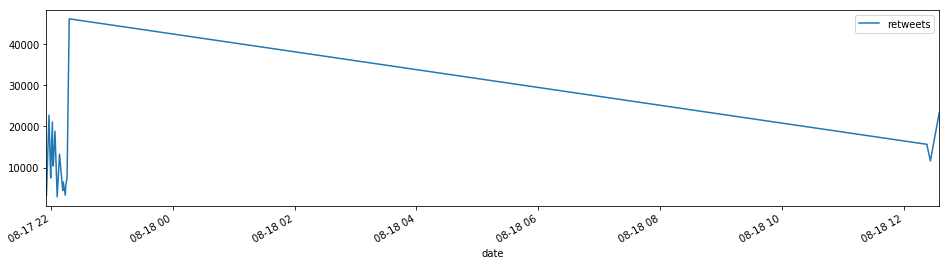

In [50]:
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
plt.show()